## Give me some credit 机器学习练习
https://zhuanlan.zhihu.com/p/36388510

In [14]:
import pandas
train='GiveMeSomeCredit-cs-training.csv'
# 数据来自https://www.kaggle.com/c/GiveMeSomeCredit/data
train=pandas.read_csv(train)
train1=train.iloc[:1000]
train1

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.357684,32,1,710.000000,NaN,6,0,0,0,0.0
996,997,0,0.102951,43,1,0.252275,10000.0,18,0,3,0,3.0
997,998,0,1.000000,60,1,10.171276,3000.0,4,0,1,1,0.0
998,999,0,0.040283,54,0,0.135554,12400.0,11,0,1,0,0.0


In [8]:
import seaborn
import matplotlib.pyplot as plt
# plt.figure(figsize=(19,15))
# seaborn.heatmap(train.corr())    

In [16]:
import pandas
test='GiveMeSomeCredit-cs-test.csv'
test=pandas.read_csv(test)
# test

In [65]:
train.loc[train['age'] == 0, 'age'] = train['age'].median()

In [67]:
import numpy as np
train['MonthlyIncome'] = train['MonthlyIncome'].replace(np.nan,train['MonthlyIncome'].mean())

In [68]:
# 对空值用中位数填充
train['NumberOfDependents'].fillna(train['NumberOfDependents'].median(), inplace=True)

In [69]:
# 去掉98和96两个点，再查看相关性如何
def replace98and96(column):
    new = []
    newval = column.median()
    for i in column:
        if (i == 96 or i == 98):
            new.append(newval)
        else:
            new.append(i)
    return new

train['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(train['NumberOfTime30-59DaysPastDueNotWorse'])
train['NumberOfTimes90DaysLate'] = replace98and96(train['NumberOfTimes90DaysLate'])
train['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(train['NumberOfTime60-89DaysPastDueNotWorse'])

test['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(test['NumberOfTime30-59DaysPastDueNotWorse'])
test['NumberOfTimes90DaysLate'] = replace98and96(test['NumberOfTimes90DaysLate'])
test['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(test['NumberOfTime60-89DaysPastDueNotWorse'])

In [70]:
test.loc[test['age'] == 0, 'age'] = test['age'].median()
test['MonthlyIncome'] = test['MonthlyIncome'].replace(np.nan,test['MonthlyIncome'].mean())
test['NumberOfDependents'].fillna(test['NumberOfDependents'].median(), inplace=True)

In [71]:
X=train.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
y=train['SeriousDlqin2yrs']
W = test.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
z = test['SeriousDlqin2yrs']

In [72]:
# 用线性回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=111)

# 调用线性回归函数，C为正则化系数，l1表示L1正则化
logit = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

# 标准化拟合
scaler = StandardScaler().fit(X_train)

# 标准化X_train 和X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [73]:
# X_train_scaled

In [74]:
# y_train

In [75]:
# 线性回归拟合
logit.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=111, solver='saga')

In [76]:

# 输入训练集，返回每个样本对应到每种分类结果的概率
logit_scores_proba = logit.predict_proba(X_train_scaled)

# 返回分类1的概率
logit_scores = logit_scores_proba[:,1]

In [77]:
# 画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

0.8160882912599647


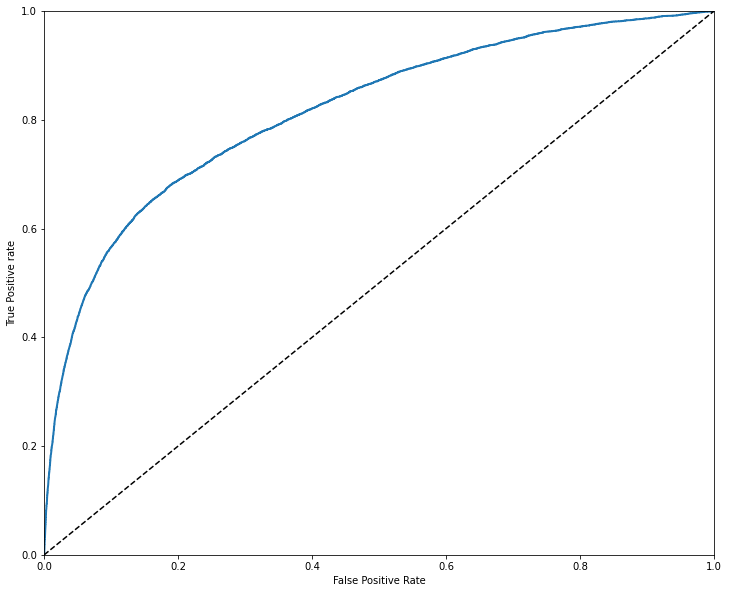

In [78]:
# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)

# 画图
plot_roc_curve(fpr_logit,tpr_logit)
print (roc_auc_score(y_train,logit_scores))

0.8117632779507644


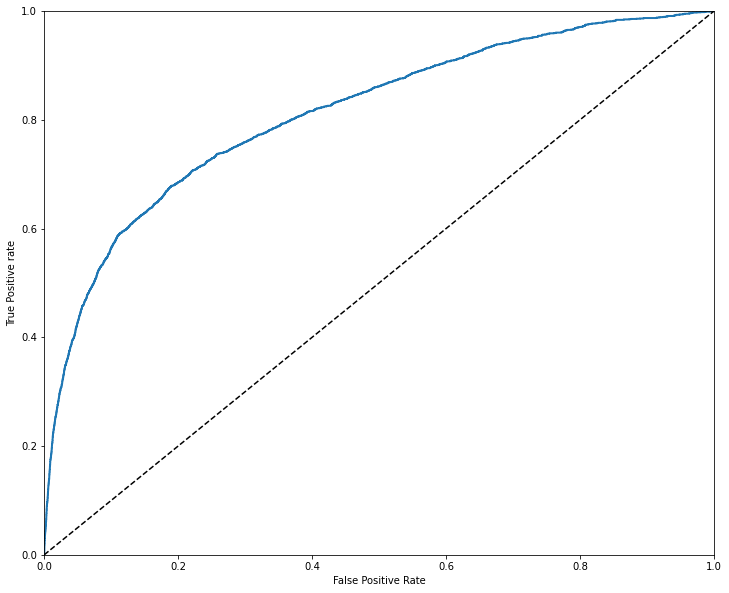

In [80]:
# 验证测试集，测试分类结果概率分布
logit_scores_proba_val = logit.predict_proba(X_test_scaled)

# 分类结果为1的概率
logit_scores_val = logit_scores_proba_val[:,1]

# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test, logit_scores_val)

# 画图
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print  (roc_auc_score(y_test,logit_scores_val))


In [82]:
# 采用LogisticRegressionCV来交叉验证选择正则化系数C
from sklearn.linear_model import LogisticRegressionCV
logit = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], penalty='l1', solver='saga', max_iter=500, class_weight='balanced', random_state=111)

# 线性回归拟合
logit.fit(X_train_scaled, y_train)

print (logit.C_)

[0.001]


0.8146945743266996


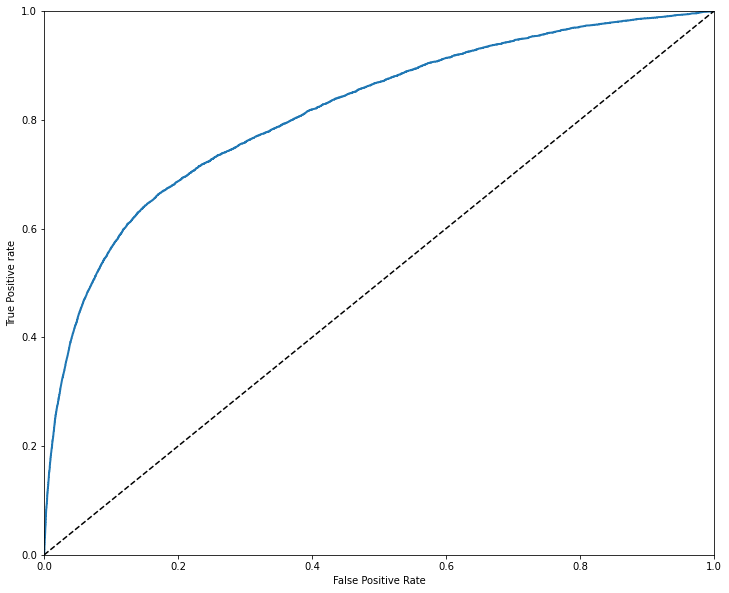

In [83]:
# 输入训练集，返回每个样本对应到每种分类结果的概率
logit_scores_proba = logit.predict_proba(X_train_scaled)

# 返回分类1的概率
logit_scores = logit_scores_proba[:,1]

# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)

# 画图
plot_roc_curve(fpr_logit,tpr_logit)
print  (roc_auc_score(y_train,logit_scores))

In [ ]:
# 降采样处理，再采用随机森林法

In [86]:
# 引入降采样模块
from imblearn.under_sampling import RandomUnderSampler

# Counter类的目的是用来跟踪值出现的次数
from collections import Counter
print ('Original dataset shape :', Counter(y))

Original dataset shape : Counter({0: 139974, 1: 10026})


In [87]:
# 调用模块
rus = RandomUnderSampler(random_state=111)

# 直接降采样后返回采样后的数值
X_resampled, y_resampled = rus.fit_sample(X, y)
print ('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({0: 10026, 1: 10026})


In [88]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled, y_resampled, random_state=111)
X_train_rus.shape, y_train_rus.shape

((15039, 10), (15039,))

AUC score:  0.5793214671576622


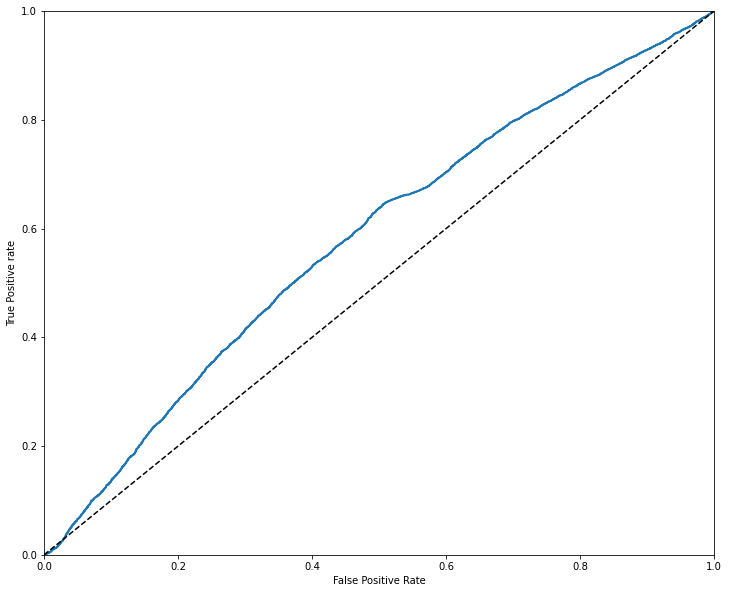

In [89]:
# 对重采样以后的数据进行分类
logit_resampled = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

logit_resampled.fit(X_resampled, y_resampled)
logit_resampled_proba_res = logit_resampled.predict_proba(X_resampled)
logit_resampled_scores = logit_resampled_proba_res[:, 1]
fpr_logit_resampled, tpr_logit_resampled, thresh_logit_resampled = roc_curve(y_resampled, logit_resampled_scores)
plot_roc_curve(fpr_logit_resampled, tpr_logit_resampled)
print ('AUC score: ', roc_auc_score(y_resampled, logit_resampled_scores))

In [ ]:
# 3.4 随机森林法分类

AUC score: 0.8644380692172087


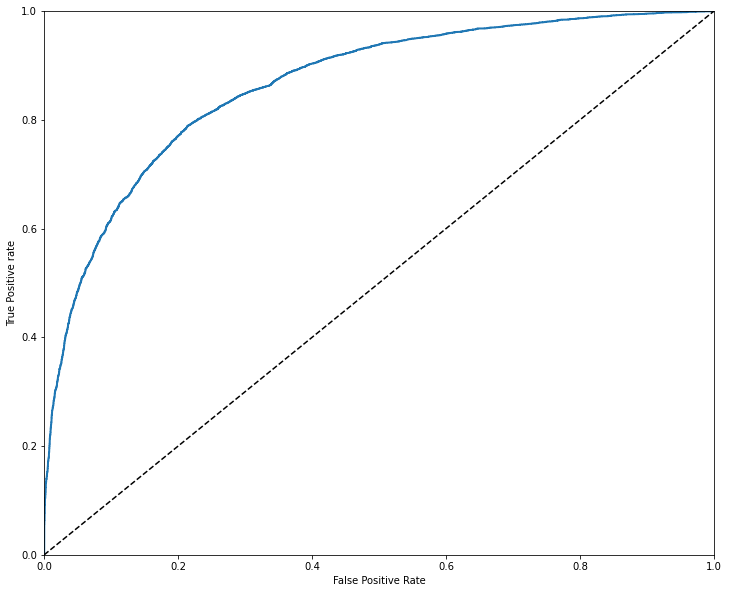

In [90]:
# 采用随机森林法分类和梯度上升法
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(n_estimators=300, random_state=111, max_depth=5, class_weight='balanced')
forest.fit(X_train_rus, y_train_rus)
y_scores_prob = forest.predict_proba(X_train_rus)
y_scores = y_scores_prob[:, 1]
fpr, tpr, thresh = roc_curve(y_train_rus, y_scores)
plot_roc_curve(fpr, tpr)
print ('AUC score:', roc_auc_score(y_train_rus, y_scores))

AUC Score: 0.853174479359851


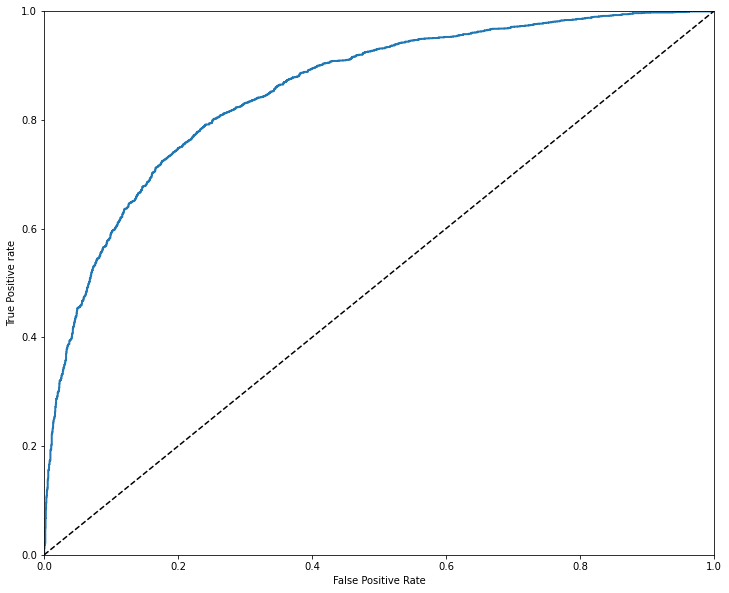

In [91]:
# 交叉验证
y_test_proba = forest.predict_proba(X_test_rus)
y_scores_test = y_test_proba[:, 1]
fpr_test, tpr_test, thresh_test = roc_curve(y_test_rus, y_scores_test)
plot_roc_curve(fpr_test, tpr_test)
print ('AUC Score:', roc_auc_score(y_test_rus, y_scores_test))

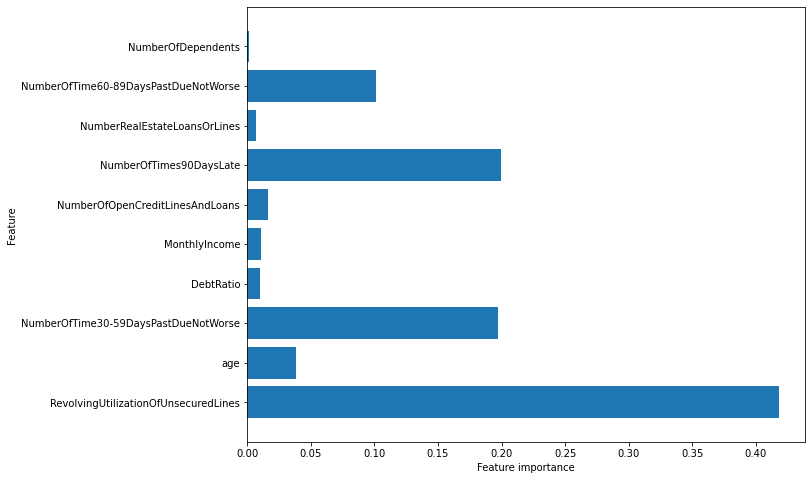

In [92]:
# 看看随机森林法对各个特征的重视程度
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

In [ ]:
# 3.5 梯度提升法分类
# 看一下梯度提升树法
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=112)
gbc_clf.fit(X_train, y_train)
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:, 1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print ('AUC Score:', roc_auc_score(y_train, gbc_clf_scores))

In [96]:
# 来看一下交叉验证的结果
gbc_val_proba = gbc_clf.predict_proba(X_test)
gbc_val_scores = gbc_val_proba[:, 1]
print ('AUC score:', roc_auc_score(y_test, gbc_val_scores))

AUC score: 0.8576066061467397


AUC Score : 0.8735591870554327
AUC Score : 0.8610156684938467


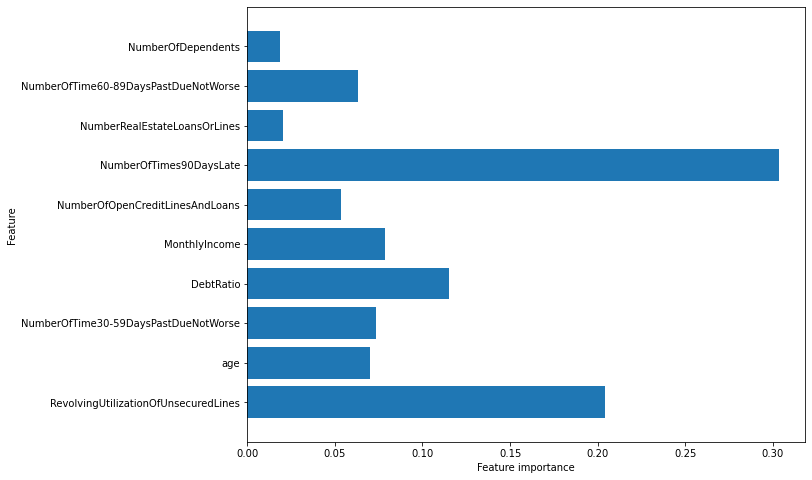

In [98]:
gbc_clf_submission = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05 ,max_depth=4,  random_state=42)
gbc_clf_submission.fit(X_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
gbc_val_proba = gbc_clf_submission.predict_proba(X_test)
gbc_val_scores = gbc_val_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
print ('AUC Score :', roc_auc_score(y_train, gbc_clf_scores))
print ('AUC Score :', roc_auc_score(y_test, gbc_val_scores))
plot_feature_importances(gbc_clf)

In [101]:
# 3.6 数据输出
import pandas as pd
submission_proba = gbc_clf_submission.predict_proba(W)
submission_scores = submission_proba[:, 1]
submission_scores.shape
W.shape
ids = np.arange(1, 101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('金融风控-kaggle-givemecredit-202009-submission.csv', index=False)